# Physical Property Equations

## Overview

The `polykin.properties.equations` module offers a number of classes to deal with the types of temperature-dependent physical property correlations most often used in polymer reactor models.

| Property                    |              Class              |
|-----------------------------|:-------------------------------:|
| Density solid               |            `DIPPR100`           |
| Density liquid              |      `DIPPR100`, `DIPPR105`     |
| Enthalpy of vaporization    |            `DIPPR106`           |
| Heat capacity solid         |      `DIPPR100`, `DIPPR102`     |
| Heat capacity liquid        |            `DIPPR100`           |
| Heat capacity gas           |            `DIPPR107`           |
| Thermal conductivity liquid |            `DIPPR100`           |
| Thermal conductivity gas    |      `DIPPR100`, `DIPPR102`     |
| Vapor pressure              | `DIPPR101`, `Antoine`, `Wagner` |
| Viscosity liquid            |        `DIPPR101`, `Yaws`       |
| Viscosity gas               |            `DIPPR102`           |
| 2nd virial coefficient      |            `DIPPR104`           |


Information about the corresponding arguments and their units are documented in the respective docstrings.

## Usage

In [1]:
# %pip install polykin
from polykin.properties.equations import DIPPR100, DIPPR101, DIPPR105, Antoine

All equations are used in the same way and have the same built-in methods. To instantiate an object, we call the respective class constructor with the desired argument values. Here are some examples.

In [2]:
# Water Cp using DIPPR-100
Cp_water = DIPPR100(276370., -2090.1, 8.125, -0.014116, 0.0000093701,
                    unit='J/kmol/K', symbol='C_p',
                    name='Cp of water')

# Water vapor pressure using DIPPR-101
Pvap_water = DIPPR101(73.649, -7258.2, -7.3037, 4.1653E-6, 2.,
                      Tmin=273., Tmax=647., unit='Pa', symbol=r'P^*',
                      name='Water, DIPPR-101')

# Water density using DIPPR-105
density_water = DIPPR105(0.14395, 0.0112, 649.727, 0.05107,
                         Tmin=273., Tmax=648., unit='kg/m³', symbol=r'\rho',
                         name='Density of water')

# Water vapor pressure using Antoine
Pvap_water_2 = Antoine(A=4.6543+5, B=1435.264, C=-64.848,
                       Tmin=255.9, Tmax=373., unit='Pa',
                       name='Water, Antoine')

To evaluate a property at a given temperature, we simply call the object with the temperature value (scalar or array-like) as the first positional argument. The temperature unit can be passed as second argument (the default is K). 

In [3]:
Cp_water(298.0)/18.02

4183.499075525065

In [4]:
Pvap_water(373.15, 'K')

np.float64(101260.56298096628)

In [5]:
density_water(25.0, 'C')

998.9463920931878

In [6]:
density_water

name:            Density of water
symbol:          \rho
unit:            kg/m³
Trange [K]:      (273.0, 648.0)
A [kg/m³]:       0.14395
B [—]:           0.0112
C [K]:           649.727
D [—]:           0.05107

All equations are vectorized to facilitate evaluation at multiple temperatures. 

In [7]:
density_water([0.0, 50.0, 100.0], Tunit='C')

array([1014.34627215,  982.72892731,  947.3649398 ])

## Plots

All equations come with a convenient built-in method named `plot()`, to enable a rapid visualization of the corresponding property.

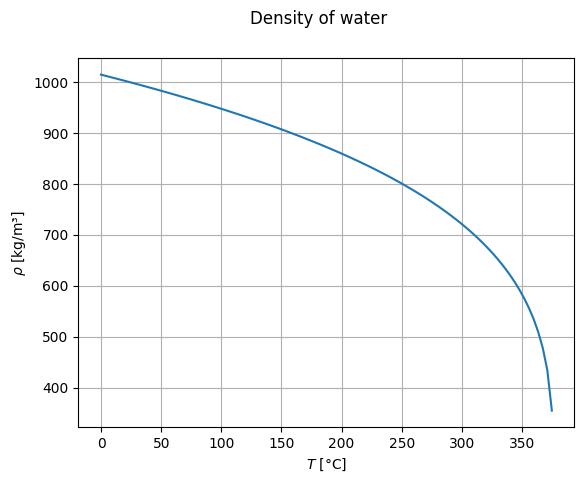

In [8]:
# Default ('linear') plot of over the validity range 
density_water.plot(Tunit='C')

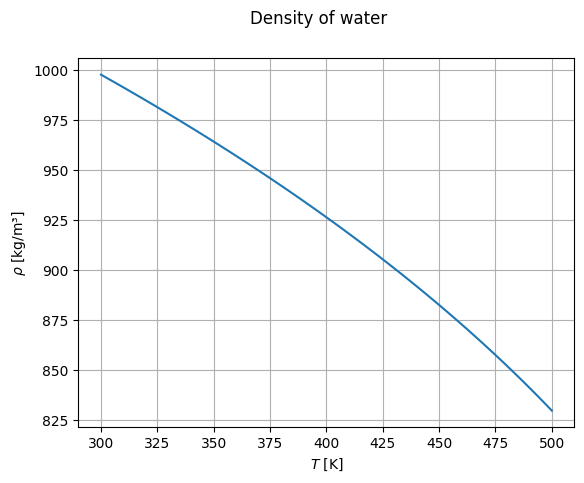

In [9]:
# plot density of water from 300-500 K
density_water.plot(Trange=(300.0, 500.0), Tunit='K')

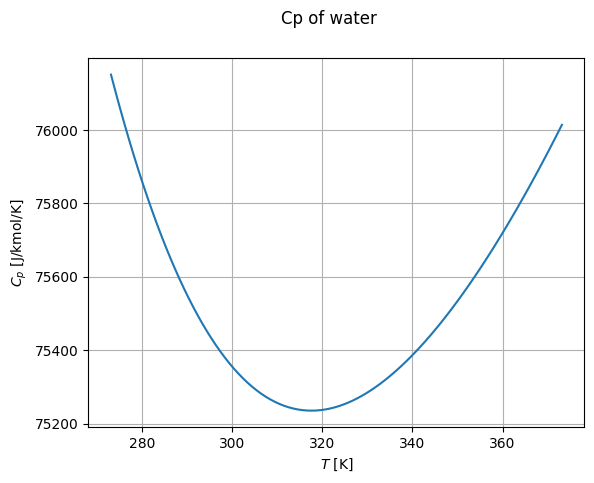

In [10]:
# If no temperature range is known, the plot range defaults to 273-373 K
Cp_water.plot()

Lastly, the function `plotequations()` can be used to overlay multiple correlations on the same plot. The optional keywords arguments are those of the `plot()` method. 

In [11]:
from polykin import plotequations

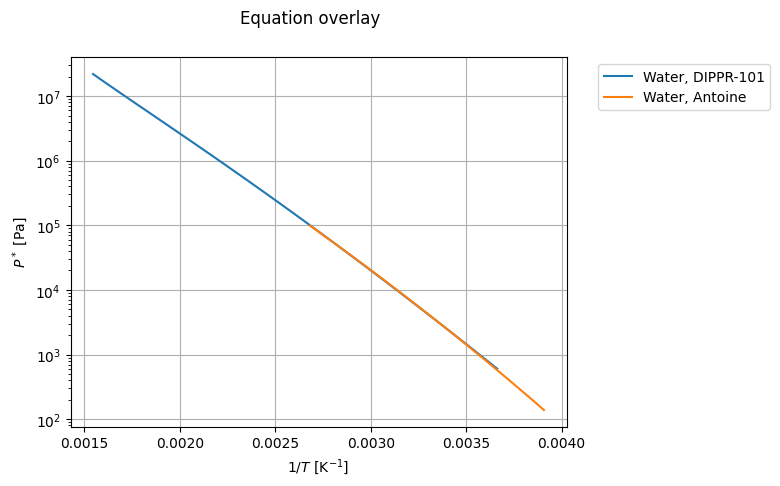

In [12]:

_ = plotequations([Pvap_water, Pvap_water_2], kind='Arrhenius')

## Fit

All equations include a `fit()` method to estimate the parameters of the correlation from user-supplied data. Let's use it to regress experimental data on the vapor pressure of water. Here is some data retrieved from the literature.

In [13]:
import numpy as np

# Data from https://doi.org/10.6028%2Fjres.080A.071
T = np.array([0.01, 25., 40., 50., 60., 70., 80., 100.]) + 273.15 # K
Pvap = [611.657, 3168.6, 7381.34, 12344.65, 19933.05, 31177.00,
        47375.2, 101325.0] # Pa

In oder to fit this data with the Antoine equation, we create the object that will hold the correlation. The parameters defined during instantiation will be used as the starting point for the non-linear regression, so they should make some sense (or at least be mathematically valid). 

In [14]:
pwater = Antoine(0.0, 0.0, 0.0, name="My vapor pressure fit")

We then call the `fit()` method with the experimental data and, eventually, other options. Since the vapor pressure data spans 2 orders of magnitude, it is appropriate to rescale the data with a log transformation (`logY=True`).

Fit successful.
A: 10.206730919820656
B: 1738.0848933740422
C: -38.93349071293703
Covariance:
[[2.36891900e-04 1.31145035e-01 1.03170306e-02]
 [1.31145035e-01 7.28264235e+01 5.74685968e+00]
 [1.03170306e-02 5.74685968e+00 4.54957450e-01]]


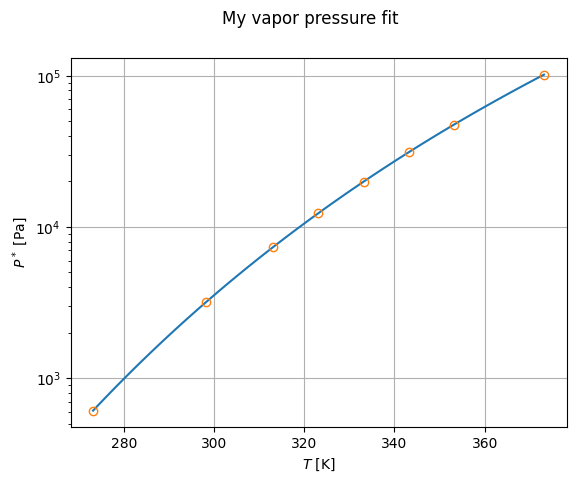

In [15]:
result = pwater.fit(T, Pvap, logY=True, plot=True)

The equation object now holds the estimated parameters and can be used as any other correlation.

In [16]:
pwater

name:            My vapor pressure fit
symbol:          P^*
unit:            Pa
Trange [K]:      (np.float64(273.15999999999997), np.float64(373.15))
A [—]:           10.206730919820656
B [K]:           1738.0848933740422
C [K]:           -38.93349071293703
base10 [—]:      True

In [17]:
pwater(100.0, 'C')

np.float64(101450.69940424078)